[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laiadc/MachineLearningHandsOn/blob/main/day5/Interpretable%20data%20science.ipynb)

# Interpretable models

Explanations by “interpretable” models are produced by inspecting the inner logic of the algorithm that has given the prediction.

<img src="interpretable_joke.png" alt="Interpretable joke" width="300"/>



## Linear regression: an interpretable model

A linear regression model predicts the target as a weighted sum of the feature inputs:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n 
$$

where $y$ is the variable we want to predict, $x_1, \cdots, x_n$ are the variables we want to use to to predict $y$ and $\beta_1, \cdots, \beta_n$ are the parameters that we need to find. 

For example, if we want to predict the rent of an appartment (variable y), we could take into account its size ($x_1$), the number of rooms ($x_2$) and the distance to closest metro station ($x_3$). 

## Importance of variables in a linear regression

Interpretation of a linear regression:

*When we increase variable $x_k$ by one unit, we increase the value of the predictoin $y$ by $\beta_k$ units when all the other variables remain fixed.*

**Example:**

Imagine we have the model 

$$
y = 3 x_1 - 5 x_2
$$

If we increase $x_1$ by one unit, the prediction $y$ will increase 3 units. On the other hand, if we increase $x_2$ by one unit, the prediction $y$ will decrease 5 units. 

**Remarks:**
There are several things we have to take into account if we want to interpret a linear model.

1. If we want to use the coefficients $\beta_k$ to see which variable is more important, all the variables should lie in the same range of variables. For example, suppose you have the model $y = 3x_1 - 5 x_2$ where $x_1$ is the weight in kg. If you change the units of $x_1$ to grams, the model will automatically become $y = 3000x_1 - 5 x_2$. Now it seems that the variable $x_1$ is much more important than the variable $x_2$, but the only thing we have done is change the range of values of $x_1$. If we want to compare the importance of $x_1$ and $x_2$, they have to be of the same magnitude.

2. The coefficients $\beta_k$ reflect the importance of the variables **only when these variables are independent.** Imagine the case where we have the model $y = 3 x_1$. Now suppose that we invent another variable $x_2$ which is exactly the same as $x_1$ ($x_2=x_1$, but with a different name). Now we could have the model $y = 4x_1 - x_2$, but the coefficients would mean nothing regarding importance. In fact we could have infinite models: $y = -2x_1 + 5x_2$, $y = 100x_1 - 97x_2, \cdots$ , or basically any model where $\beta_1 + \beta_2=3$.  

## Example of a linear regression

In the following example, we will use multiple linear regression to predict the CO2 emission (i.e., the dependent variable $y$) of  multiple cars by using 2 independent/input variables ($x_1, x_2$):

+ Volume (in $m^3$)
+ Weight (in tones)

Let's look at the dataset we will work with:

In [1]:
import pandas as pd
df = pd.read_csv("cars.csv")
df.head(10)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,0.790,99
1,Mitsubishi,Space Star,1200,1.160,95
2,Skoda,Citigo,1000,0.929,95
3,Fiat,500,900,0.865,90
4,Mini,Cooper,1500,1.140,105
5,VW,Up!,1000,0.929,105
6,Skoda,Fabia,1400,1.109,90
7,Mercedes,A-Class,1500,1.365,92
8,Ford,Fiesta,1500,1.112,98
9,Audi,A1,1600,1.150,99


## Performing a linear regression

Now that we have our data we can perform a linear regression using the python library `sklearn`.

Linear regression Coefficients:  Weight = 7.550947270300684,       Volume=0.007805257527747127



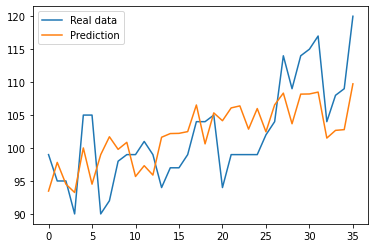

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['Weight', 'Volume']]
y = df['CO2']

lm =LinearRegression()
lm.fit(X, y)
print('Linear regression Coefficients:  Weight = {}, \
      Volume={}\n'.format(lm.coef_[0],lm.coef_[1]))

y_hat = lm.predict(X)
plt.plot(y, label='Real data')
plt.plot(y_hat, label='Prediction')
plt.legend()
plt.show()

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > With the previous coefficients can we infer which variabe is more important to predict the CO2 emissions? Which one do you think it is? </div>

## The importance of normalization

As we have mentioned before, the linear regression coefficients only give us information about the importance of each variable if those varables have the same range of values. Let's have a look at the variables of our dataset:

In [3]:
X.head(10)

,Weight,Volume
0,0.790,1000
1,1.160,1200
2,0.929,1000
3,0.865,900
4,1.140,1500
5,0.929,1000
6,1.109,1400
7,1.365,1500
8,1.112,1500
9,1.150,1600


We see that the volume has values of the order of 900-1600 approximately, while the weight (in tones) has values of 0.5-1.5. The difference in scale is too large, and therefore the coefficients do not give enough information about the imprtance of such variables. To solve this problem, we can normalize the values of the weight and volume so that they are between 0 and 1. We will use a function in the `sklearn package`.

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns= X.columns).head(10)

,Weight,Volume
0,0.000000,0.0625
1,0.387029,0.1875
2,0.145397,0.0625
3,0.078452,0.0000
4,0.366109,0.3750
5,0.145397,0.0625
6,0.333682,0.3125
7,0.601464,0.3750
8,0.336820,0.3750
9,0.376569,0.4375


Now we can perform the linear regression again with the normalized data.

Linear regression Coefficients:  Weight = 7.2187055904074455,       Volume=12.488412044395409



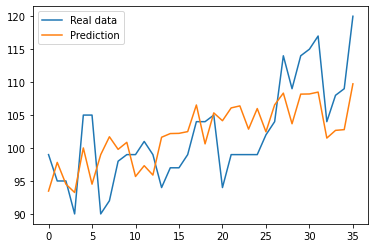

In [5]:
from sklearn import linear_model
import matplotlib.pyplot as plt
 
lm2 = linear_model.LinearRegression()
lm2.fit(X_scaled, y)
print('Linear regression Coefficients:  Weight = {}, \
      Volume={}\n'.format(lm2.coef_[0], lm2.coef_[1]))

y_hat = lm2.predict(X_scaled)
plt.plot(y, label='Real data')
plt.plot(y_hat, label='Prediction')
plt.legend()
plt.show()

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Whih variable is more important to predict the CO2 consumption in cars? </div>

# Garson algorithm

Similar to the linear regression problem, the weights of the neural networks can be used as an indicator of the importance of the input variables. That is, using the trained weights of the neural network we can estimate which inputs have a higher impact on the final output. 

**Remark:** This algoithm is only valid for fully-connected networks and preferably with few hidden layers. Even though it is not the most used algorithm currently, it is quite illustrative.

## How does the algorithm work?

Imagine you have trained a neural network to perform a certain task. Such neural network has three inputs (three variables that you want to use to predict the output), one hidden layer with two neurons and one output neuron. This architecture is shown in the following image:


<img src="Garson2.png" alt="Example NN" width="600"/>

The weights $w_{A1}, w_{B1}, w_{A2}, w_{B2}, w_{A3}, w_{B3}, w_{OA}, w_{OB}$ have been learnt during the training phase.

The Garson algorithm consists of the following steps:

1. Compute the matrix containing input-hidden-output weights:

|         | Hidden A | Hidden B|
|---------| -------- | ------- |
| Input 1 | $w_{A1}$ | $w_{B1}$|
| Input 2 | $w_{A2}$ | $w_{B2}$|
| Input 3 | $w_{A3}$ | $w_{B3}$|
| Output  | $w_{OA}$ | $w_{OB}$|

2. Calculate the **contribution of each input to the output** via each hidden neuron: The contribution is the product of the input-hidden weight times the hidden-output weight.

|         | Hidden A &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;| Hidden B &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;|
|---------| -----------------------------  | ----------------------------- |
| Input 1 | $c_{A1} = w_{A1} \cdot w_{OA}$ | $c_{B1} = w_{B1} \cdot w_{OB}$ |
| Input 2 | $c_{A2} = w_{A2} \cdot w_{OA}$ | $c_{B2} =  \cdots           $ |
| Input 3 | $c_{A3} =  \cdots           $  | $c_{B3} =  \cdots           $ |

3. Calculate the **relative contribution** of each input to a particular neuron:

|         | Hidden A &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;| Hidden B &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;|
|---------| -----------------------------  | ----------------------------- |
| Input 1 | $r_{A1} = \frac{|c_{A1}|}{|c_{A1}| + |c_{A2}| + |c_{A3}|}$ | $r_{B1} = \frac{|c_{B1}|}{|c_{B1}| + |c_{B2}| + |c_{B3}|}$ |
| Input 2 | $r_{A2} = \frac{|c_{A2}|}{|c_{A1}| + |c_{A2}| + |c_{A3}|}$ | $r_{B2} =  \cdots           $ |
| Input 3 | $r_{A3} =  \cdots           $  | $r_{B3} =  \cdots           $ |


4. **Sum the relative input contributions** to each neuron

|       |  &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|-------| --------------------------  |
|Input 1|$S_1 = r_{A1} + r_{B1}$      |
|Input 2|$S_2 = r_{A2} + r_{B2}$      |
|Input 3|$S_3 = \cdots$               |


5. Finally, calculate the relative sum of each input, which gives the **importance** of each input:

|       |  &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;   &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|-------| --------------------------  |
|Input 1|$I_1 = \frac{S_1}{S_1 + S_2 + S_3}$      |
|Input 2|$I_2 = \cdots$      |
|Input 3|$I_3 = \cdots$               |

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Copy the previous tables in a notebook and complete the missing values</div>

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > Given the following values of the neural network weights, compute the relative importance of each input using Garson's algorithm.</div>

|         | Hidden A &nbsp; &nbsp;&nbsp;  &nbsp; &nbsp;&nbsp;  &nbsp; &nbsp;&nbsp; | Hidden B &nbsp; &nbsp;&nbsp;  &nbsp; &nbsp;&nbsp;  &nbsp; &nbsp;&nbsp;|
|---------| -------- | ------- |
| Input 1 | $w_{A1} = -2.61$ | $w_{B1} = -1.23$|
| Input 2 | $w_{A2} = 0.13$ | $w_{B2} = -0.91$|
| Input 3 | $w_{A3} = -0.69$ | $w_{B3} = -2.09$|
| Output  | $w_{OA} = 1.11$ | $w_{OB}= 0.39$|

<div class = "alert alert-info" style = "border-radius:10px" ><b>EXERCISE:</b > The following code calculates the Garson algorithm for a neural network with one hidden layer. Compare your results with the output of the code.</div>

In [6]:
# A = matrix of weights of input-hidden layer (rows=input & cols=hidden)
# B = vector of weights of hidden-output layer

# A = [[W_A1, W_B1],
#      [W_A2, W_B2],
#      [W_A3, W_B3]]

# B = [W_OA, W_OB]

import numpy as np

In [7]:
A= np.array([[-2.61, -1.23],
            [0.13, -0.91],
            [-0.69, -2.09]])

B = np.array([1.11, 0.39])

In [8]:
def garson(A, B):
    """
    Computes Garson's algorithm
    A = matrix of weights of input-hidden layer (rows=input & cols=hidden)
    B = vector of weights of hidden-output layer
    """
    B = np.diag(B)

    # connection weight through the different hidden node
    cw = np.dot(A, B)

    # weight through node (axis=0 is column; sum per input feature)
    cw_h = abs(cw).sum(axis=0)

    # relative contribution of input neuron to outgoing signal of each hidden neuron
    # sum to find relative contribution of input neuron
    rc = np.divide(abs(cw), abs(cw_h))
    rc = rc.sum(axis=1)

    # normalize to 100% for relative importance
    ri = rc / rc.sum()
    return(ri)

In [9]:
garson(A,B)

array([0.52585654, 0.12651545, 0.34762801])

To explore other algorithms to interpret deep learning models, see:

https://distill.pub/2018/building-blocks/